# Linear Regression Assignment

##### The objective of this assignment is to build a Multiple Linear Regression model on the given dataset to predict the demand for shared bikes. 

# 

# Business Understanding

A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors.

# Business Objective

You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 



# 

## Step 1: Reading and Understanding the Data

In [282]:
# supress warnings

import warnings
warnings.filterwarnings('ignore')

In [336]:
# import required libraries

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [284]:
pd.set_option('display.max_columns', 300)

In [286]:
# read the data from the dataset

boombikes=pd.read_csv("day.csv")

In [287]:
# check the head of the dataset

boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


Inspect various aspects of the dataframe

In [288]:
boombikes.shape

(730, 16)

In [289]:
boombikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [290]:
boombikes.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Step2: Visualising the data

Let's now spend some time doing what is arguably the most important step - understanding the data.

- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

#### Visualising numeric variables using pairplot 

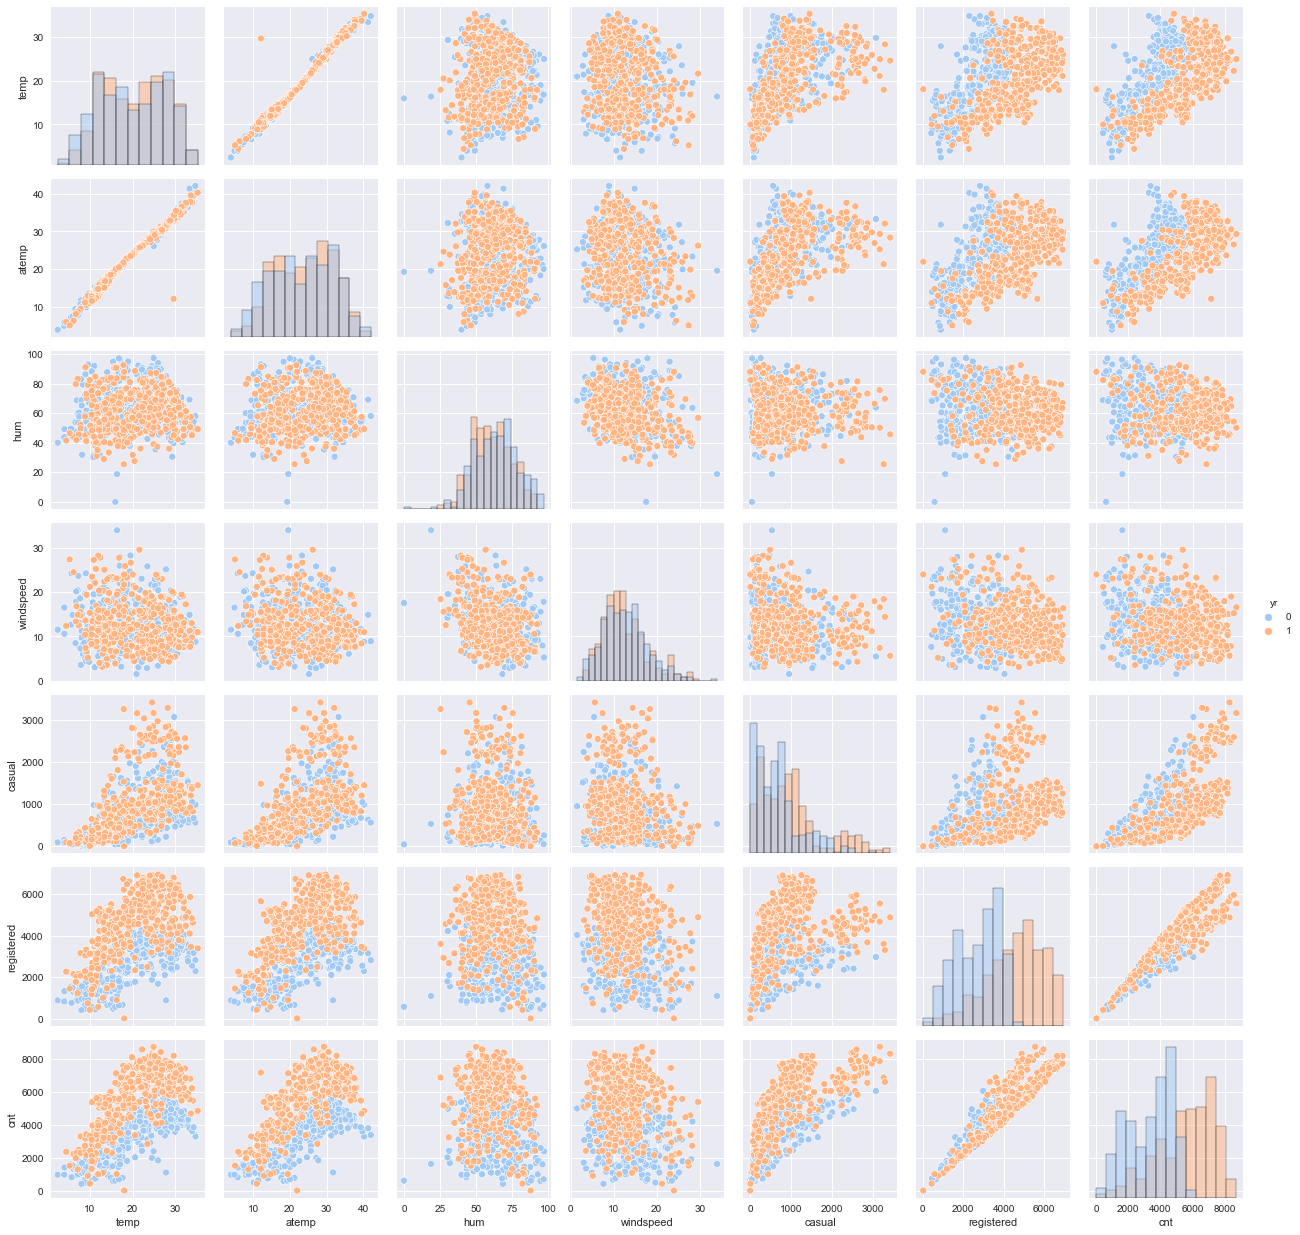

In [291]:
g=sns.PairGrid(boombikes[['temp','atemp','hum','windspeed','casual','registered','cnt','yr']], palette='pastel', hue='yr')
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()
plt.show()

#### Visualising Categorical Variables

In [292]:
boombikes.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


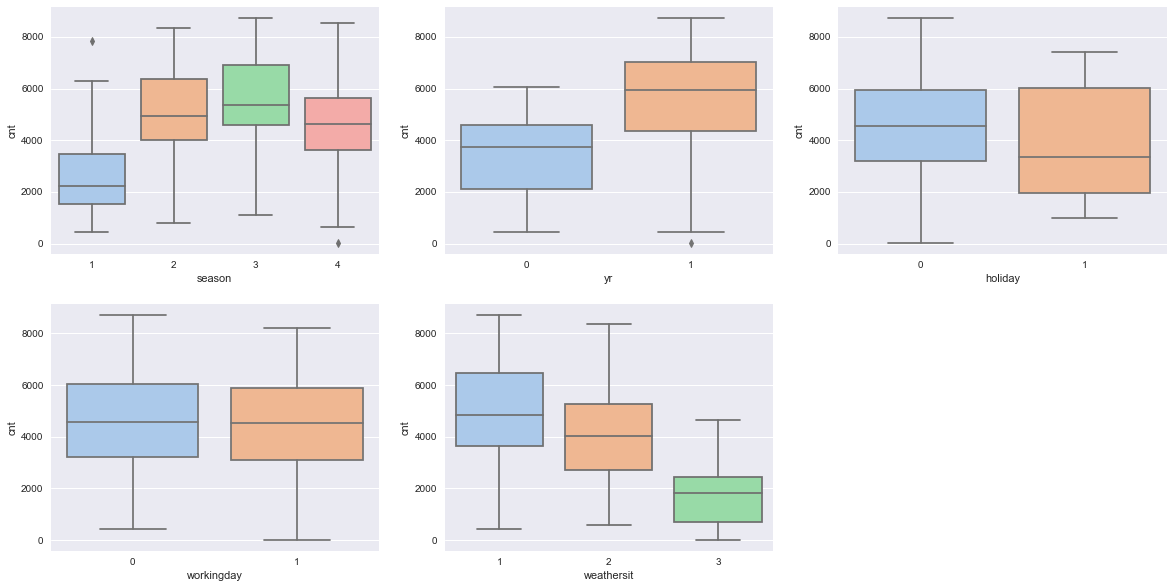

In [293]:
# Visualising Categorical variiables using box plots
plt.style.use("seaborn")
sns.color_palette("pastel")
plt.figure(figsize=(20,10))
plt.subplot(2,3,1)
sns.boxplot(x='season', y='cnt', data=boombikes, palette='pastel')

plt.subplot(2,3,2)
sns.boxplot(x='yr', y='cnt', data=boombikes, palette='pastel')


plt.subplot(2,3,3)
sns.boxplot(x='holiday', y='cnt', data=boombikes, palette='pastel')


plt.subplot(2,3,4)
sns.boxplot(x='workingday', y='cnt', data=boombikes, palette='pastel')


plt.subplot(2,3,5)
sns.boxplot(x='weathersit', y='cnt', data=boombikes, palette='pastel')

plt.show()

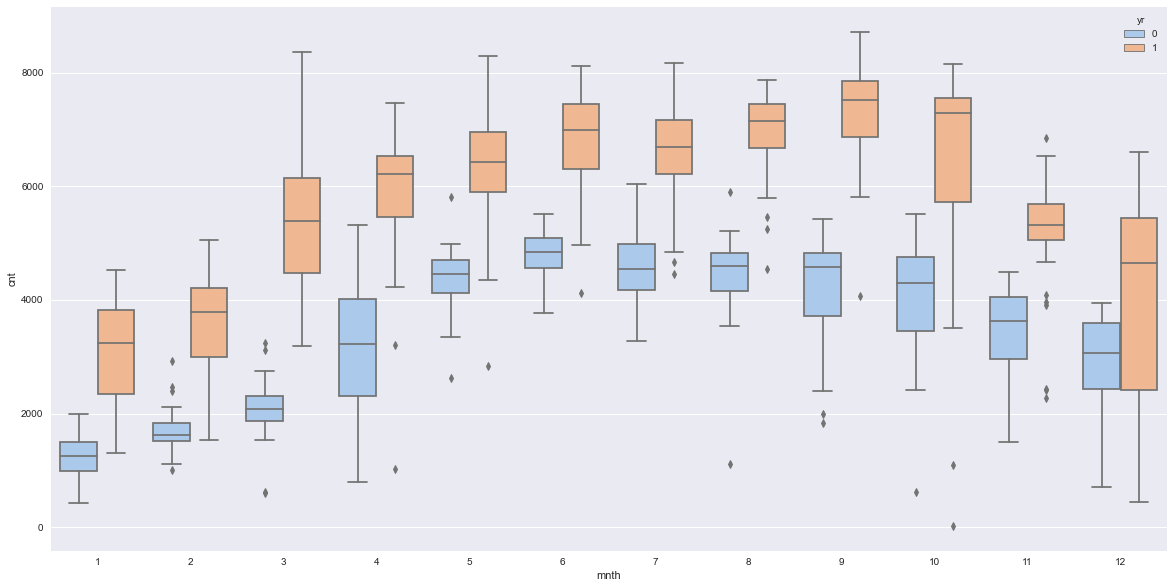

In [294]:
plt.style.use("seaborn")
plt.figure(figsize=(20,10))
sns.boxplot(x='mnth', y='cnt', hue='yr', data=boombikes, palette='pastel')
plt.show()

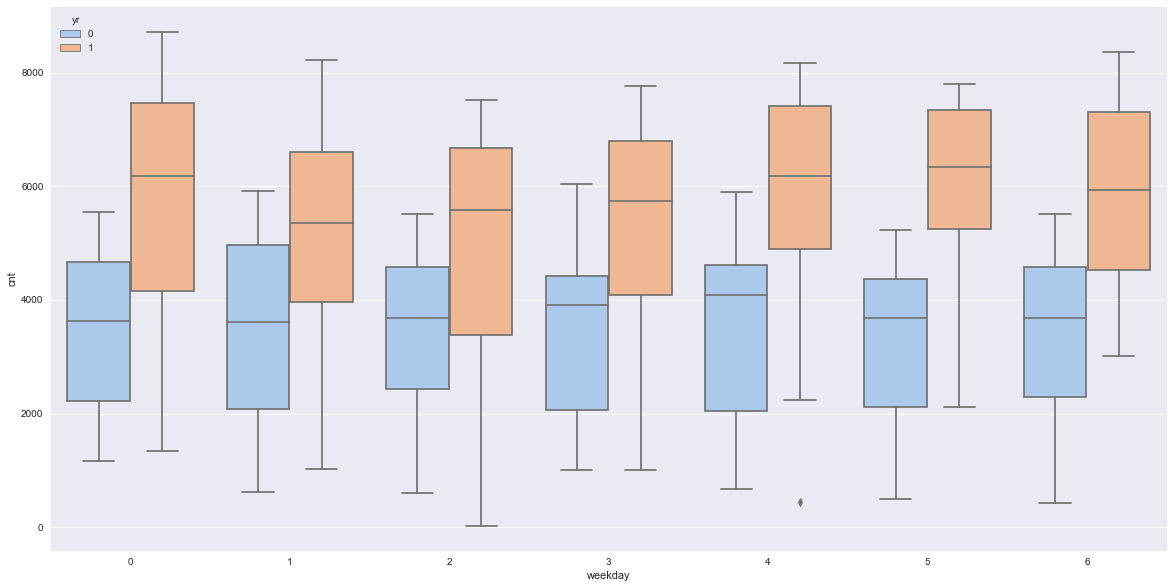

In [295]:
plt.style.use("seaborn")
plt.figure(figsize=(20,10))
sns.boxplot(x='weekday', y='cnt', hue='yr', data=boombikes, palette='pastel')
plt.show()

# Step 3: Data Preparation

In [296]:
# dropping dteday,instant as we already have days in instant column

boombikes.drop(columns=['dteday','instant','casual','registered'], axis=1, inplace=True)

In [297]:
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


### Dummy Variables

Creating Dummy variables for season,mnth,weekday and weathersit

In [298]:
# Dummies for season and dropping first column
s=pd.get_dummies(boombikes['season'], drop_first=True)

In [299]:
#renaming columns 2: summer ,3: fall , 4:winter
s.rename(columns={2  : 'summer', 3 : 'fall', 4 :'winter'},inplace=True)

In [300]:
# concat s to boombikes
boombikes=pd.concat([boombikes,s], axis=1)

In [301]:
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0


In [302]:
# Dummies for mnth and dropping first column

m=pd.get_dummies(boombikes['mnth'], drop_first=True)

In [303]:
# renaming columns based on months

m.rename(columns={2: 'Feb', 3 : 'Mar', 4 : 'Apr', 5 : 'May', 6 : 'Jun', 7 : 'Jul', 8 : 'Aug', 9: 'Sep', 10: 'Oct', 11 : 'Nov', 12 : 'Dec'},inplace= True )

In [304]:
# concat m to boombikes

boombikes=pd.concat([boombikes,m], axis=1)

In [305]:
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [306]:
# Dummies for weekday and dropping first column

w=pd.get_dummies(boombikes.weekday, drop_first=True)

In [307]:
# renaming weekdays

w.rename(columns={1 : 'Mon', 2 : 'Tue', 3 : 'Wed', 4 : 'Thu', 5 : 'Fri', 6: 'Sat'}, inplace=True)

In [308]:
# concat w to boombikes

boombikes=pd.concat([boombikes,w], axis=1)

In [309]:
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [310]:
# Dummies for weathersit

ws=pd.get_dummies(boombikes['weathersit'])

In [311]:
# rename columns
ws.rename(columns={1 : 'Clear', 2 : 'Mist + Cloudy', 3 : 'Light Snow'}, inplace=True)

In [312]:
# concat ws to boombikes
boombikes=pd.concat([boombikes,ws], axis=1)

In [313]:
boombikes.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Clear,Mist + Cloudy,Light Snow
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [314]:
# dropping season, mnth, weekday and weathersit columns

boombikes.drop(columns=['season', 'mnth', 'weekday','weathersit'] , axis=1, inplace=True)

In [315]:
boombikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Clear,Mist + Cloudy,Light Snow
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [263]:
boombikes.shape

(730, 33)

# Step 4: Splitting the Data into Training and Testing Sets

In [316]:
# splitting the data into train and test

np.random.seed(0)

df_train, df_test= train_test_split(boombikes, train_size=0.7, test_size=0.3, random_state=100 )

### Rescaling the data

We shall use MinMax scaler to rescale the data

In [317]:
scaler= MinMaxScaler()

In [318]:
boombikes.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Clear,Mist + Cloudy,Light Snow
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [320]:
num_vars=['temp', 'atemp', 'hum', 'windspeed','cnt']

df_train[num_vars]=scaler.fit_transform(df_train[num_vars])

In [321]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Clear,Mist + Cloudy,Light Snow
653,1,0,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0
576,1,0,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
426,1,0,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
728,1,0,1,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0
482,1,0,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0


In [322]:
df_train.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Clear,Mist + Cloudy,Light Snow
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.025490,0.711765,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,0.066667,0.098039,0.078431,0.084314,0.074510,0.076471,0.096078,0.080392,0.086275,0.086275,0.084314,0.154902,0.152941,0.135294,0.143137,0.147059,0.129412,0.627451,0.343137,0.029412
std,0.500429,0.157763,0.453386,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,0.249689,0.297660,0.269113,0.278131,0.262857,0.266010,0.294988,0.272166,0.281045,0.281045,0.278131,0.362166,0.360284,0.342373,0.350557,0.354512,0.335985,0.483958,0.475223,0.169124
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


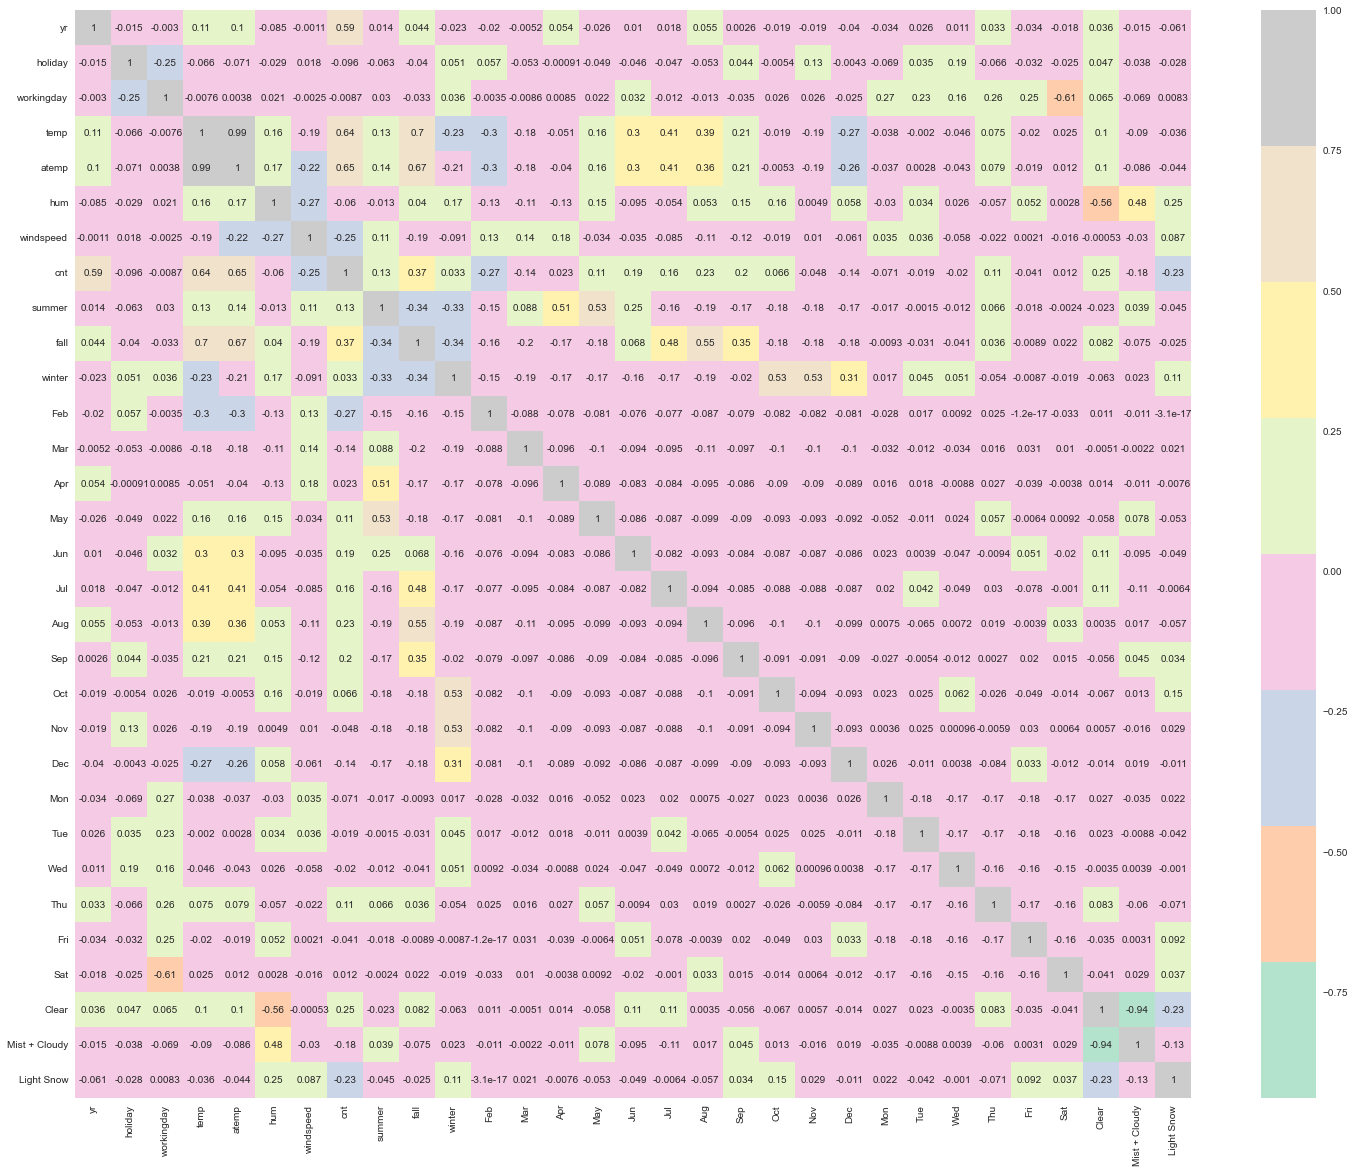

In [323]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (25, 20))
sns.heatmap(df_train.corr(), annot=True, cmap='Pastel2')
plt.show()

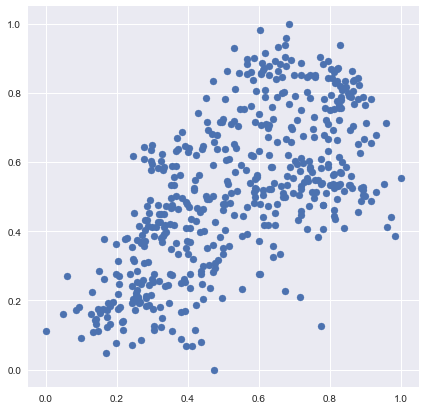

In [324]:
# temp is corrrelated to cnt column the most.

plt.figure(figsize=(7,7))

plt.scatter(df_train.temp, df_train.cnt)

plt.show()

### Dividing into X and Y sets for the model building 

In [325]:
y_train=df_train.pop('cnt')
X_train=df_train

# Step 5: Building a linear model

we will be using the LinearRegression function from SciKit Learn for its compatibility with RFE (which is a utility from sklearn)

In [342]:
# Running RFE with the output number of the variable equal to 10

lm= LinearRegression()

lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)  
rfe.fit(X_train, y_train)

RFE(estimator=LinearRegression(), n_features_to_select=15)

In [343]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 7),
 ('temp', True, 1),
 ('atemp', False, 5),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('Feb', False, 6),
 ('Mar', True, 1),
 ('Apr', False, 3),
 ('May', False, 2),
 ('Jun', False, 4),
 ('Jul', False, 9),
 ('Aug', True, 1),
 ('Sep', True, 1),
 ('Oct', True, 1),
 ('Nov', False, 10),
 ('Dec', False, 11),
 ('Mon', False, 12),
 ('Tue', False, 13),
 ('Wed', False, 16),
 ('Thu', False, 8),
 ('Fri', False, 15),
 ('Sat', False, 14),
 ('Clear', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Light Snow', True, 1)]

In [352]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'fall', 'winter',
       'Mar', 'Aug', 'Sep', 'Oct', 'Clear', 'Mist + Cloudy', 'Light Snow'],
      dtype='object')

In [353]:
X_train.columns[~rfe.support_]

Index(['workingday', 'atemp', 'Feb', 'Apr', 'May', 'Jun', 'Jul', 'Nov', 'Dec',
       'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

In [346]:
X_train_rfe=X_train[col]

In [347]:
X_train_rfe=sm.add_constant(X_train_rfe)

In [348]:
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [349]:
#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     192.2
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          9.02e-190
Time:                        18:53:07   Log-Likelihood:                 513.33
No. Observations:                 510   AIC:                            -996.7
Df Residuals:                     495   BIC:                            -933.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0984      0.024      4.056

In [350]:
X=X_train_rfe

In [351]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
13,Clear,inf
14,Mist + Cloudy,inf
15,Light Snow,inf
7,fall,6.29
3,temp,3.72
6,summer,2.65
8,winter,2.34
4,hum,1.91
10,Aug,1.68
12,Oct,1.52


In [357]:
# Fall has high VIF and high p-value

X=X.drop('fall', axis=1)

X_train_lm=sm.add_constant(X)

In [358]:
lm_2=sm.OLS(y_train, X_train_lm).fit()

In [359]:
lm_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.844
Model:                            OLS   Adj. R-squared:                  0.840
Method:                 Least Squares   F-statistic:                     206.1
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          2.26e-190
Time:                        19:09:22   Log-Likelihood:                 511.99
No. Observations:                 510   AIC:                            -996.0
Df Residuals:                     496   BIC:                            -936.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1002      0.024      4.128      0.000       0.052       0.148
yr                0.2286      0.008     28.318      0.000       0.213       0.244
holiday          -0.0920      0.026     -3.606      0.000      -0.142      -0.042
temp              0.5364      0.022     23.849      0.000       0.492       0.581
hum              -0.1790      0.037     -4.795      0.000      -0.252      -0.106
windspeed        -0.1893      0.026     -7.396      0.000      -0.240      -0.139
summer            0.1049      0.011      9.643      0.000       0.083       0.126
winter            0.1393      0.012     11.321      0.000       0.115       0.164
Mar               0.0238      0.014      1.681      0.093      -0.004       0.052
Aug               0.0608      0.016      3.723      0.000       0.029       0.093
Sep               0.1296      0.016      7.927      0.000       0.097       0.162
Oct               0.0383      0.017      2.212      0.027       0.004       0.072
Clear             0.1322      0.008     15.735      0.000       0.116       0.149
Mist + Cloudy     0.0775      0.011      6.893      0.000       0.055       0.100
Light Snow       -0.1095      0.022     -5.029      0.000      -0.152      -0.067
==============================================================================
Omnibus:                       64.908   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              143.567
Skew:                          -0.694   Prob(JB):                     6.68e-32
Kurtosis:                       5.198   Cond. No.                     6.15e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 3.76e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [360]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
12,Clear,inf
13,Mist + Cloudy,inf
14,Light Snow,inf
4,hum,1.87
7,winter,1.79
3,temp,1.62
11,Oct,1.49
9,Aug,1.46
6,summer,1.38
10,Sep,1.25


In [363]:
# Dropping the columns Mar as it has high p-value

X=X.drop('Mar', axis=1)

In [364]:
X_train_lm=sm.add_constant(X)

In [365]:
X_train_lm

,const,yr,holiday,temp,hum,windspeed,summer,winter,Aug,Sep,Oct,Clear,Mist + Cloudy,Light Snow
653,1.0,1,0,0.509887,0.575354,0.300794,0,1,0,0,1,1,0,0
576,1.0,1,0,0.815169,0.725633,0.264686,0,0,0,0,0,1,0,0
426,1.0,1,0,0.442393,0.640189,0.255342,0,0,0,0,0,0,1,0
728,1.0,1,0,0.245101,0.498067,0.663106,0,0,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.504508,0.188475,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526,1.0,1,0,0.824514,0.605840,0.355596,1,0,0,0,0,0,1,0
578,1.0,1,0,0.863973,0.679690,0.187140,0,0,1,0,0,1,0,0
53,1.0,0,0,0.202618,0.435939,0.111379,0,0,0,0,0,1,0,0
350,1.0,0,0,0.248216,0.577930,0.431816,0,1,0,0,0,0,1,0


In [366]:
lm_3=sm.OLS(y_train, X_train_lm).fit()

In [367]:
lm_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.843
Model:                            OLS   Adj. R-squared:                  0.839
Method:                 Least Squares   F-statistic:                     222.3
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          6.02e-191
Time:                        19:13:48   Log-Likelihood:                 510.54
No. Observations:                 510   AIC:                            -995.1
Df Residuals:                     497   BIC:                            -940.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1056      0.024      4.382      0.000       0.058       0.153
yr                0.2288      0.008     28.291      0.000       0.213       0.245
holiday          -0.0945      0.026     -3.702      0.000      -0.145      -0.044
temp              0.5308      0.022     23.821      0.000       0.487       0.575
hum              -0.1803      0.037     -4.823      0.000      -0.254      -0.107
windspeed        -0.1868      0.026     -7.297      0.000      -0.237      -0.136
summer            0.1048      0.011      9.620      0.000       0.083       0.126
winter            0.1353      0.012     11.189      0.000       0.112       0.159
Aug               0.0588      0.016      3.604      0.000       0.027       0.091
Sep               0.1280      0.016      7.829      0.000       0.096       0.160
Oct               0.0386      0.017      2.226      0.026       0.005       0.073
Clear             0.1334      0.008     15.906      0.000       0.117       0.150
Mist + Cloudy     0.0788      0.011      7.017      0.000       0.057       0.101
Light Snow       -0.1067      0.022     -4.904      0.000      -0.149      -0.064
==============================================================================
Omnibus:                       64.556   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              151.845
Skew:                          -0.670   Prob(JB):                     1.06e-33
Kurtosis:                       5.313   Cond. No.                     1.74e+15
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.67e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [368]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
11,Clear,inf
12,Mist + Cloudy,inf
13,Light Snow,inf
4,hum,1.87
7,winter,1.72
3,temp,1.59
10,Oct,1.49
8,Aug,1.45
6,summer,1.38
9,Sep,1.24


In [369]:
# dropping Clear, Mist + Cloudy and Light Snow as they have very high p-values

X=X.drop(['Clear','Mist + Cloudy','Light Snow'], axis=1)

X_train_lm= sm.add_constant(X)

In [370]:
lm_4=sm.OLS(y_train, X_train_lm).fit()

In [371]:
lm_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.815
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     219.5
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          1.49e-175
Time:                        19:17:17   Log-Likelihood:                 468.46
No. Observations:                 510   AIC:                            -914.9
Df Residuals:                     499   BIC:                            -868.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3245      0.027     11.932      0.000       0.271       0.378
yr             0.2288      0.009     26.146      0.000       0.212       0.246
holiday       -0.0820      0.028     -2.969      0.003      -0.136      -0.028
temp           0.5623      0.023     23.970      0.000       0.516       0.608
hum           -0.3528      0.032    -10.947      0.000      -0.416      -0.289
windspeed     -0.2359      0.027     -8.687      0.000      -0.289      -0.183
summer         0.1053      0.012      8.934      0.000       0.082       0.128
winter         0.1393      0.013     10.651      0.000       0.114       0.165
Aug            0.0571      0.018      3.235      0.001       0.022       0.092
Sep            0.1222      0.018      6.903      0.000       0.087       0.157
Oct            0.0259      0.019      1.380      0.168      -0.011       0.063
==============================================================================
Omnibus:                       96.534   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              239.345
Skew:                          -0.957   Prob(JB):                     1.06e-52
Kurtosis:                       5.756   Cond. No.                         14.8
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [372]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,39.57
7,winter,1.71
3,temp,1.50
10,Oct,1.48
8,Aug,1.45
6,summer,1.37
9,Sep,1.24
4,hum,1.18
5,windspeed,1.14
1,yr,1.02


In [373]:
# Oct has high p-value

X=X.drop('Oct', axis=1)

X_train_lm=sm.add_constant(X)

In [374]:
lm_5=sm.OLS(y_train, X_train_lm).fit()

In [375]:
lm_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.814
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     243.2
Date:                Sun, 06 Nov 2022   Prob (F-statistic):          2.39e-176
Time:                        19:19:13   Log-Likelihood:                 467.49
No. Observations:                 510   AIC:                            -915.0
Df Residuals:                     500   BIC:                            -872.6
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.3187      0.027     11.850      0.000       0.266       0.372
yr             0.2286      0.009     26.104      0.000       0.211       0.246
holiday       -0.0830      0.028     -3.004      0.003      -0.137      -0.029
temp           0.5681      0.023     24.585      0.000       0.523       0.613
hum           -0.3484      0.032    -10.854      0.000      -0.412      -0.285
windspeed     -0.2331      0.027     -8.600      0.000      -0.286      -0.180
summer         0.1040      0.012      8.845      0.000       0.081       0.127
winter         0.1480      0.011     12.930      0.000       0.126       0.170
Aug            0.0547      0.018      3.111      0.002       0.020       0.089
Sep            0.1183      0.017      6.764      0.000       0.084       0.153
==============================================================================
Omnibus:                       88.287   Durbin-Watson:                   2.016
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              207.524
Skew:                          -0.898   Prob(JB):                     8.64e-46
Kurtosis:                       5.557   Cond. No.                         14.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [376]:
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,38.64
3,temp,1.45
8,Aug,1.43
6,summer,1.37
7,winter,1.31
9,Sep,1.21
4,hum,1.17
5,windspeed,1.13
1,yr,1.02
2,holiday,1.01


# Step 6: Residual Analysis of Train Data 

In [377]:
y_train_pred=lm_5.predict(X_train_lm)

Text(0.5, 0, 'Errors')

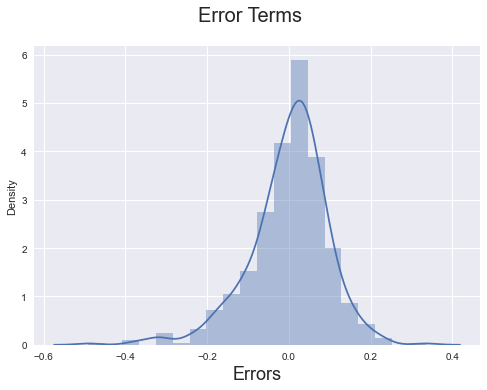

In [378]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)     

# Step 7: Making Predictions Using the Final Model¶

### Rescaling the numeric variables

In [379]:
num_vars=['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[num_vars]=scaler.transform(df_test[num_vars])

In [380]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Mon,Tue,Wed,Thu,Fri,Sat,Clear,Mist + Cloudy,Light Snow
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.479452,0.036530,0.639269,0.558941,0.532991,0.638508,0.313350,0.520592,0.264840,0.246575,0.232877,0.100457,0.054795,0.091324,0.086758,0.095890,0.105023,0.059361,0.086758,0.082192,0.073059,0.086758,0.118721,0.123288,0.155251,0.141553,0.132420,0.173516,0.652968,0.319635,0.027397
std,0.500722,0.188034,0.481313,0.233698,0.217888,0.148974,0.159947,0.218435,0.442259,0.432005,0.423633,0.301297,0.228100,0.288730,0.282125,0.295115,0.307285,0.236840,0.282125,0.275286,0.260830,0.282125,0.324202,0.329520,0.362974,0.349389,0.339723,0.379560,0.477117,0.467403,0.163612
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.261915,-0.042808,0.048205,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.354650,0.344751,0.527265,0.198517,0.377531,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558691,0.549198,0.627737,0.299459,0.524275,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.759096,0.714132,0.743928,0.403048,0.672745,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002146,0.807474,0.963300,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [382]:
# Splitting the test data set into X and y

y_test=df_test.pop('cnt')
X_test=df_test

In [390]:
X_test_rfe=X_test[col]

In [386]:
X_test_rfe.head()

,yr,holiday,temp,hum,windspeed,summer,fall,winter,Mar,Aug,Sep,Oct,Clear,Mist + Cloudy,Light Snow
184,0,1,0.831783,0.657364,0.084219,0,1,0,0,0,0,0,0,1,0
535,1,0,0.901354,0.610133,0.153728,1,0,0,0,0,0,0,1,0,0
299,0,0,0.511964,0.837699,0.334206,0,0,1,0,0,0,1,0,1,0
221,0,0,0.881625,0.437098,0.339570,0,1,0,0,1,0,0,1,0,0
152,0,0,0.817246,0.314298,0.537414,1,0,0,0,0,0,0,1,0,0


In [391]:
# dropping the columns fall, Mar, Clear, Mist + Cloudy, Light Snow,Oct

X_test_rfe=X_test_rfe.drop(['fall', 'Mar', 'Clear', 'Mist + Cloudy', 'Light Snow', 'Oct'], axis=1)

In [392]:
X_test_lm=sm.add_constant(X_test_rfe)

In [393]:
# predict

y_test_pred=lm_5.predict(X_test_lm)

# Step 8: Evaluating the model

In [406]:
# evaluate the model

print('R2 for Train Data: ', r2_score(y_true= y_train, y_pred=y_train_pred))
print('R2 for Train Data: ',r2_score(y_true= y_test, y_pred=y_test_pred))

R2 for Train Data:  0.8140502941139249
R2 for Train Data:  0.8045914379451117


Text(0, 0.5, 'y_pred')

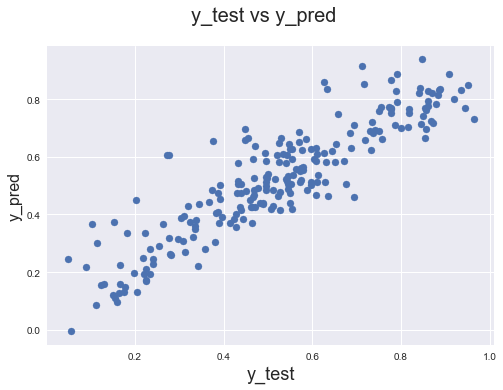

In [397]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)      

#### We can see our best fit line is

cnt=0.2286 * yr - 0.083 * holiday + 0.5681 * temp - 0.3484 * hum - 0.2331 * windspeed + 0.104 * summer + 0.148 * winter + 0.0547 * Aug + 0.1183 * Sep